# Analyzing Data on Cab Companies in Chicago Illinois

We have been given 2 datasets and for these two datasets we will import the files, study the data they contain
to make sure the data types are correct, will then identify the top 10 neighborhoods in terms of drop-offs
and lastly make graphs accordingly: taxi companies and number of rides, top 10 neighborhoods by number of dropoffs.
Lastly we will draw conclusions based on each graph and test the hypothesis of: "The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays."

## Exploratory Data Analysis & Visualization

### General Information & Data Preprocessing for Dataset #1

We start our project by loading the required libraries that we will need to complete future tasks. Additionally, we open our dataset and have a first glance in our data.

In [1]:
import numpy as np
#needed for mathematical operations

import pandas as pd
#needed for dataframe manipulation

from scipy import stats as st
#needed for statistical analysis

import matplotlib.pyplot as plt
#needed for data visualization

import warnings
warnings.filterwarnings ("ignore")
#needed to ignore future warnings

In [2]:
df = pd.read_csv('/datasets/project_sql_result_04.csv')
#loading our dataset

df.shape
#getting the dataset's number of rows and columns 

df.info()
#getting the main info from our dataset

df.head()
#printing the first 5 rows of our dataset

df.duplicated().sum()
#checking for dupliactes in our df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


0

It's important when working with data to always understand what we are looking at, which in this case our dataset cotains the dropoff_location_name (dropoff neighborhood name) and the average_trips column (the average number of rides that ended in each neighborhood in November 2017).

Lastly, we have been taught that when working with data is better to have all characters lower case so we would need to change make lower case all the characters on the dropoff_location_name column.

In [3]:
df['dropoff_location_name'] = df['dropoff_location_name'].str.lower()
#making all letters in the column lower case

df.info()
#getting the main info from our dataset

df.head()
#printing the first 5 rows of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,loop,10727.466667
1,river north,9523.666667
2,streeterville,6664.666667
3,west loop,5163.666667
4,o'hare,2546.900000


### General Information & Data Preprocessing for Dataset #2 

In [4]:
df2 = pd.read_csv('/datasets/project_sql_result_01.csv')
#loading our second dataset

df2.shape
#getting the dataset's number of rows and columns 

df2.info()
#getting the main info from our dataset

df2.head()
#printing the first 5 rows of our dataset

df2.duplicated().sum()
#checking for dupliactes in our df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


0

Same as above here we would need to change all the letters at the company_name column to lower case and we should be good to move forward. Additionally our second dataset contains two columns, company_name (the number of trips_amount for each taxi company on November 15-16, 2017).

In [5]:
df2['company_name'] = df2['company_name'].str.lower()
#making all letters in the column lower case

df2.info()
#getting the main info from our dataset

df2.head()
#printing the first 5 rows of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,flash cab,19558
1,taxi affiliation services,11422
2,medallion leasing,10367
3,yellow cab,9888
4,taxi affiliation service yellow,9299


### Exploratory Data Analysis & Visualization for Both Datasets

In [6]:
top10 = df.sort_values(by='average_trips', ascending=False).head(10)
#storing the top 10 drop off locations to a variable called top10

print (top10)
#printing the top10 drop off locations

  dropoff_location_name  average_trips
0                  loop   10727.466667
1           river north    9523.666667
2         streeterville    6664.666667
3             west loop    5163.666667
4                o'hare    2546.900000
5             lake view    2420.966667
6            grant park    2068.533333
7         museum campus    1510.000000
8            gold coast    1364.233333
9    sheffield & depaul    1259.766667


#### Bar Graph for the Top 10 Neighborhoods by Number of Dropoffs

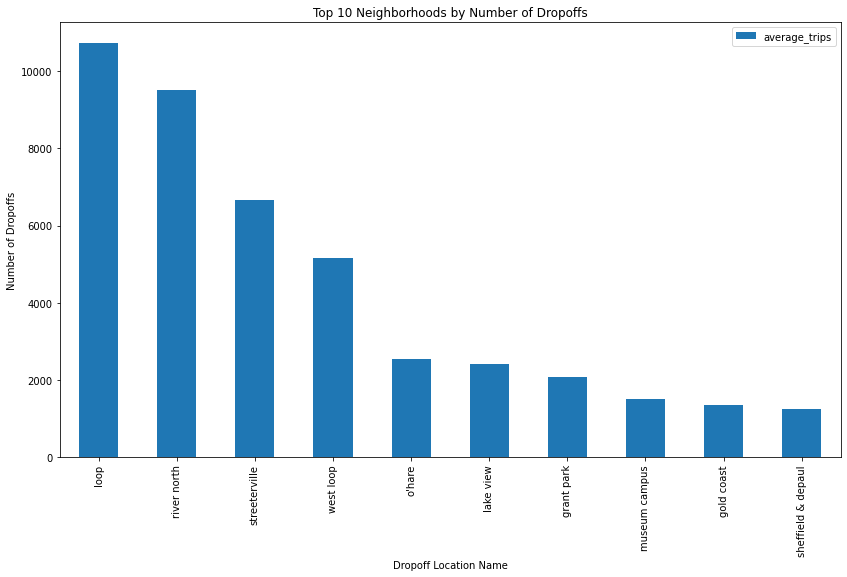

In [11]:
top10.plot(kind='bar', x='dropoff_location_name', y='average_trips', figsize=(14, 8))
#creating a bar chart

plt.title("Top 10 Neighborhoods by Number of Dropoffs")
#having a title to the chart

plt.xlabel("Dropoff Location Name")
#naming x axis

plt.ylabel("Number of Dropoffs")
#naming y axis

plt.show()

In [12]:
topcompanies = df2.sort_values(by='trips_amount', ascending=False).head(15)
#sorting the top 15 cab companies to a variable called topcompanies

print (topcompanies)
#printing the top 15 cab companies

                               company_name  trips_amount
0                                 flash cab         19558
1                 taxi affiliation services         11422
2                         medallion leasing         10367
3                                yellow cab          9888
4           taxi affiliation service yellow          9299
5                 chicago carriage cab corp          9181
6                              city service          8448
7                                  sun taxi          7701
8                 star north management llc          7455
9         blue ribbon taxi association inc.          5953
10                  choice taxi association          5015
11                               globe taxi          4383
12                dispatch taxi affiliation          3355
13                nova taxi affiliation llc          3175
14  patriot taxi dba peace taxi association          2235


#### Bar Graph for Taxi Companies and Number of Rides

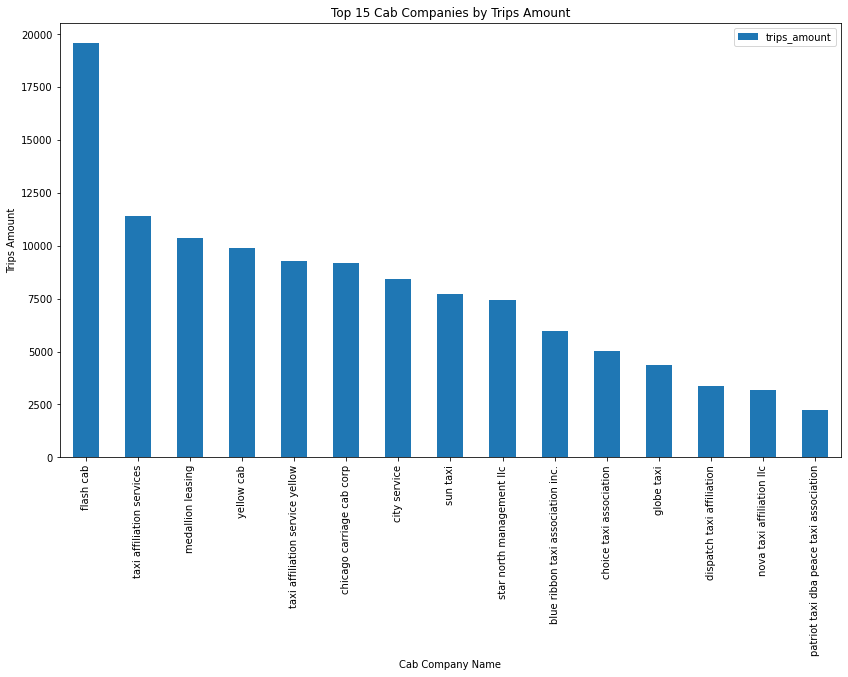

In [20]:
topcompanies.plot(kind='bar', x='company_name', y='trips_amount', figsize=(14, 8))

plt.title("Top 15 Cab Companies by Trips Amount")
#having a title to the chart

plt.xlabel("Cab Company Name")
#naming x axis

plt.ylabel("Trips Amount")
#naming y axis

plt.show()

### Exploratory Data Analysis & Visualization Conclusion

In our data eploratory analysis and visualization we determined that the 3 most common drop off locations are: loop, river north and streeterville respectively. We plotted bar charts to show the top 10 neighborhoods by number of dropoffs as well as the top 15 the taxi companies and number of rides. We concluded that number one cab company is 'flash cab' and has almost double the amount of trips from the second most populae cab company called 'taxi affiliation services'.

## Testing Hypotheses

In [14]:
df3 = pd.read_csv('/datasets/project_sql_result_07.csv')
#loading our third dataset

df3.shape
#getting the dataset's number of rows and columns 

df.info()
#getting the main info from our dataset

df3.head()
#printing the first 5 rows of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


It's important when working with data to always understand what we are looking at, which in this case our dataset cotains the start_ts column (date and time of the beginning of the ride (time rounded to the hour)), the weather_conditions column (brief description of weather conditions, e.g. "light rain" or "scattered clouds") and lastly the duration_seconds column (ride duration in seconds). All of our data types seem to be correct except that of the start-ts column which needs to be converted to a datetime data type before moving forward with our testing hypothesis. 

In [15]:
df3['start_ts'] = pd.to_datetime(df3['start_ts'], format="%Y-%m-%d %H:%M:%S")
#converting the df['start_ts'] column to datetime

df3['weather_conditions'] = df3['weather_conditions'].str.lower()
#making all letters in the column lower case

df3.info()
#getting the main info from our dataset

df3.head()
#printing the first 5 rows of our dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,good,2410.0
1,2017-11-25 14:00:00,good,1920.0
2,2017-11-25 12:00:00,good,1543.0
3,2017-11-04 10:00:00,good,2512.0
4,2017-11-11 07:00:00,good,1440.0


### Stating H0 and HA

Let’s start by specifying our null hypothesis and alternate hypothesis:

Null Hypothesis (H0): The average duration of rides from the Loop to O'Hare International Airport are the same on rainy Saturdays.

Alternate Hypothesis (HA): The average duration of rides from the Loop to O'Hare International Airport are <strong> NOT </strong> the same on rainy Saturdays.

In [16]:
### First we will make sure that we filter the df according to the weather condition. 

In [17]:
df_good_weather = df3[df3['weather_conditions'] == 'good']
#creating a new df with just the good weather

df_good_weather.info()
#getting the overall info

df_good_weather.head(10)
#confirming 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 1066
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            888 non-null    datetime64[ns]
 1   weather_conditions  888 non-null    object        
 2   duration_seconds    888 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.8+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,good,2410.0
1,2017-11-25 14:00:00,good,1920.0
2,2017-11-25 12:00:00,good,1543.0
3,2017-11-04 10:00:00,good,2512.0
4,2017-11-11 07:00:00,good,1440.0
5,2017-11-11 04:00:00,good,1320.0
7,2017-11-18 11:00:00,good,2280.0
8,2017-11-11 14:00:00,good,2460.0
9,2017-11-11 12:00:00,good,2040.0
10,2017-11-18 06:00:00,good,1500.0


In [18]:
df_bad_weather = df3[df3['weather_conditions'] == 'bad']
#creating a new df with just the bad weather

df_bad_weather.info()
#getting the overall info

df_bad_weather.head(10)
#confirming 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 6 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            180 non-null    datetime64[ns]
 1   weather_conditions  180 non-null    object        
 2   duration_seconds    180 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.6+ KB


,start_ts,weather_conditions,duration_seconds
6,2017-11-04 16:00:00,bad,2969.0
30,2017-11-18 12:00:00,bad,1980.0
34,2017-11-04 17:00:00,bad,2460.0
51,2017-11-04 16:00:00,bad,2760.0
52,2017-11-18 12:00:00,bad,2460.0
54,2017-11-18 10:00:00,bad,1440.0
65,2017-11-04 18:00:00,bad,2363.0
70,2017-11-18 16:00:00,bad,3000.0
78,2017-11-04 16:00:00,bad,3120.0
92,2017-11-18 07:00:00,bad,1511.0


So as we stated above the null hypothesis is that the average duration of rides from the Loop to O'Hare International Airport are the same on rainy Saturdays and the alternate hypothesis is that are not the same.

In [19]:
alpha = 0.05 
#creating our statistical significance at 5% 

results = st.ttest_ind(df_good_weather['duration_seconds'], df_bad_weather['duration_seconds'], equal_var=False)
#performing the t-test with the help of the scipy library 

print ('p-value:', results.pvalue) 
#printing the p-value

if results.pvalue > alpha: 
#if p-value is greater than alpha 

    print ("We can't reject the null Hypothesis") 
    #we won't reject the null hypothesis

else:
    print ("We reject the null hypothesis") 
    #we will reject the null hypothesis

p-value: 6.738994326108734e-12
We reject the null hypothesis


### Conclusion

It turns out that we have sufficient evidence to accept the alternate hypothesis.

## Overall Conclusion

In this project we looked into 3 different datasets and tried to analyze the data we were given. Additionally we converted any data type that had to be corrected and later we used the matplotlib library to visualize our outcomes. Lastly, we used the testing hypothesis to see whether or not the average duration of rides from the Loop to O'Hare International Airport are the same on rainy Saturdays. We concluded that since our p value is higher than that of the significance level we had sufficient evidence to accept the alternate hypothesis.